<a href="https://colab.research.google.com/github/nprimavera/Robot-Learning/blob/main/mecs6616_Spring2025_Project1_ncp2136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MECS6616 Spring 2025 - Project 1**

> Add blockquote



# **Introduction**

***IMPORTANT:***
- **Before starting, make sure to read the [Assignment Instructions](https://courseworks2.columbia.edu/courses/197115/pages/assignment-instructions) page on Courseworks to understand the workflow and submission requirements for this project.**


This project applies classical machine learning techniques within a robotics context. Specifically, you will develop a navigation agent designed to maneuver through a simple 2D maze environment.

<div>
<img src="https://drive.google.com/uc?id=1mSpegY1psdek3Lgh6cxzcCGUCF-lddnV" width="300"/>
</div>

The figure above illustrates the simulation world, where the "robot" (also referred to as "agent") is represented by a green dot, and the goal location is marked by a red square. The agent's objective is to navigate to this goal location, avoiding any obstacles (depicted as black boxes) along the way.

To navigate to the goal location, the agent will learn appropriate behaviors by imitating demonstrations from an expert user. These demonstrations have been collected in advance by a human controlling the agent via a keyboard. These demonstrations will be provided to you as training data.

For this project, we explicitly prohibit the use of Deep Learning and Reinforcement Learning techniques. Instead, we will focus on "traditional" supervised learning methods. In future projects, where we will employ DL and RL, we will have the opportunity to understand and appreciate the significant advantages they offer over traditional methods.

You should use the scikit-learn library to implement learning algorithms in this project. Comprehensive documentation on its general usage and individual functions can be found on the [scikit-learn page](https://scikit-learn.org/stable/).

This project has 3 parts. The instructions for each part are detailed below.

# **Project Setup (do NOT change)**


***IMPORTANT:***
- Do NOT change this "*Project Setup*" section
- Do NOT install any other dependencies or a different version of an already provided package. You may, however, import other packages. Note that scikit-learn is already installed in Colab
- Your code should go under the subsequent sections with headings "*Part 1*", "*Part 2*", and "*Part 3*"
- The "*Testing*" section allows you to test your code's performance using an autograder
- You may find it useful to minimize sections using the arrows located to the left of each section heading

You will be accessing data files located in a class github repo. The following cell clones the repo into the working directory

In [ ]:
# do NOT change

# This cell should take less than a minute to run.
# After running this cell, the folder 'robot-learning-S2024' will show up in the file explorer on the left
# Click on the folder icon if it's not open. Refresh the 'File' page if you still don't see any new files
!git clone https://github.com/roamlab/robot-learning-S2024.git

Cloning into 'robot-learning-S2024'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 63 (delta 9), reused 57 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (63/63), 625.84 KiB | 5.69 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
# do NOT change

# Copy the files needed for project 1 into the current working directory. This is simply to make accessing files easier
!cp -av /content/robot-learning-S2024/project1/* /content/

'/content/robot-learning-S2024/project1/data' -> '/content/data'
'/content/robot-learning-S2024/project1/data/bc_with_gtpos_data.pkl' -> '/content/data/bc_with_gtpos_data.pkl'
'/content/robot-learning-S2024/project1/data/reg_test_data.pkl' -> '/content/data/reg_test_data.pkl'
'/content/robot-learning-S2024/project1/data/regression_data.pkl' -> '/content/data/regression_data.pkl'
'/content/robot-learning-S2024/project1/data/bc_data.pkl' -> '/content/data/bc_data.pkl'
'/content/robot-learning-S2024/project1/data_utils.py' -> '/content/data_utils.py'
'/content/robot-learning-S2024/project1/mjcf' -> '/content/mjcf'
'/content/robot-learning-S2024/project1/mjcf/common' -> '/content/mjcf/common'
'/content/robot-learning-S2024/project1/mjcf/common/materials.xml' -> '/content/mjcf/common/materials.xml'
'/content/robot-learning-S2024/project1/mjcf/common/skybox.xml' -> '/content/mjcf/common/skybox.xml'
'/content/robot-learning-S2024/project1/mjcf/common/visual.xml' -> '/content/mjcf/common/visua

In [ ]:
# do NOT change

# Installing pybullet, the physics engine that we will use for simulation
!pip install pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
# do NOT change

# Installing numpngw for visualization
!pip3 install numpngw

# Part 1. Inferring the Position of an Agent with RGB Images

<div>
<img src="https://drive.google.com/uc?id=1Cn2sAcz0sOXX5x1dvRCEtKCL5yJDYkKS" width="300"/>
</div>


Your first task is learning to predict the agent's location within the maze using RGB image observations, such as the one shown above. Each such observation is an RGB image with dimensions $[64, 64]$ for each color channel, resulting in an overall shape of $[64, 64, 3]$ per observation.

The maze has its own coordinate system, which you will use to express the agent's location. You will be provided with RGB image observations from this environment, along with the corresponding ground truth location of the agent, expressed in the maze's coordinate system.

The task is to develop a model capable of predicting the agent's location based on these RGB observations. Note that this can be seen as a regression problem (if the location of the agent is a continuous variable) or a classification problem (if we discretize the output space to a finite number of possible locations).

In this part, you will need to implement the class *PositionRegressor*. Your class will contain two methods:
- *train()*: trains a position regressor using the given data
- *predict()*: predicts the agent's locations given a batch of observations

We will test the performance of your model in this part using the Mean Square Error (MSE) between the predicted positions and the actual (ground truth) positions. We will evaluate your implementation on both the training data (which your model will be trained on) and additional testing data that is held out. Your score will be $$\text{score} = 1 - MSE$$ and then clipped between 0 and 1.

Please implement your solution below by completing the two methods for the *PositionRegressor* class. Note that the actual training and prediction occur in the *Testing* section, where our scoring code loads the data from a file and calls your functions, passing them the appropriate arguments. In *Part 1* (and the subsequent *Part 2* & *Part 3*), you are only required to complete the methods. You do not need to load data and perform training & prediction.

We have provided dummy solutions for all three parts of this assignment. This ensures that the scoring function in the *Testing* section can be executed successfully, even if you have completed only a portion of this assignment. If you would like to test your *train()* and *predict()* methods while you're working on it, simply run the code for all three parts, and run the *score_all_parts()* function in the *Testing* section. This will run your *train()* and *predict()* methods

In [ ]:
# Implement Part 1 Below

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class PositionRegressor():  # This class contains two methods: train() and predict()

    """
    Inferring the Position of an Agent with RGB Images
      - learn how to predict the agent's location within the maze using RGB image observations
      - each observation is an RGB image with dimensions [64, 64] for each color channel, resulting in an overall shape of [64, 64, 3] per observation
      - the maze has its own coordinate system, which you will use to express the agent's location
      - can be seen as a regression or classification problem:
        - regression problem (if the location of the agent is a continuous variable)
        - classification problem (if we discretize the output space to a finite number of possible locations)
    """

    def train(self, data):  # Trains a position regressor using the given data

        """
        A method that trains a regressor using the given data
        Args:
            data: a dictionary that contains images and the corresponding ground truth location of an agent.
        Returns:
            Nothing
        """

        # TODO

        print('\n\nPart 1: Position Regressor\n')
        print('\nTraining model...\n')

        # Preliminary code
        #print(f"\nStarter code for visualizing the dataset:\n")
        #for key, val in data.items():
        #  print(key, val) # x [obs] and y [actions] values

        # Initialize the observations (x-values) and agent positions (y-values) - data used for supervised learning
        self.X = data['obs'] # observations
        self.Y = np.asarray([info['agent_pos'] for info in data['info']])  # agent positions

        # Reshape the x-values - LinearRegression expects a 2D array where [rows = samples] , [columns = features]
        self.X_reshaped = self.X.reshape(-1, 64*64*3)
        self.X_reshaped2 = self.X.reshape(self.X.shape[0], -1) # both work

        # Print the data set
        #print("\nData used for supervised learning:")
        #print(f'\nX values (observations):\n \n{X}\n')
        #print(f'\nY values (agent positions):\n \n{Y}\n')
        #print(f'\nX values after being reshaped:\n \n{X_reshaped}\n')

        # Data structure shapes
        print(f'\nShape of observation data (X-values): {self.X.shape}')
        print(f'Shape of agent position data (Y-values): {self.Y.shape}')
        print(f'Shape of observation data (X-values) after being reshaped: {self.X_reshaped.shape}\n')
        #print(f'Shape of observation data (X-values) after being reshaped: {self.X_reshaped2.shape}\n')

        # Model (Linear Regression)
        self.model = LinearRegression()  # Linear Regression Model

        # Split the data set into testing and training data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X_reshaped, self.Y, test_size=0.2, random_state=42)

        # Train the model
        self.model.fit(self.X_train, self.Y_train)

        print("\nModel training complete.\n")

    def predict(self, Xs):  # Predicts the agent's locations given a batch of observations

        """
        A method that predicts y's given a batch of X's
        Args:
            Xs: a batch of data (in this project, it is in the shape [batch_size, 64, 64, 3])
        Returns:
            The predicted locations (y's) of the agent from your trained model. Note that this method expects batched inputs and returns batched outputs
        """

        # TODO

        print('\nPredicting model...\n')

        # Reshape Args (Xs) to comply with Linear Regression model (2D array)
        self.Xs_reshaped = Xs.reshape(Xs.shape[0], -1)

        # Print data
        #print(f'\nXs values:\n \n{Xs}\n')
        #print(f'\nXs values after being reshaped:\n \n{Xs_reshaped}\n')

        # Data structure (shape)
        print(f'\nShape of observation data (Xs): {Xs.shape}')
        print(f'Shape of observation data (Xs) after being reshaped: {self.Xs_reshaped.shape}\n')

        # Predict locations (y's) of the agent using the Linear Regression Model
        self.y_pred = self.model.predict(self.Xs_reshaped)

        print('\nModel prediction complete.\n')

        return self.y_pred

# Part 2. Behavioral Cloning with Low Dimensional Data

In *Part 2*, your task is to develop a model that decides the agent's next action based on environmental observations. The agent has three possible actions: moving up, left, or right. The objective is to navigate the agent towards the goal square, which is marked in red in the figures provided above.

Note that, in general terms, what you are providing here is a "policy" - a model that selects an action based on observations from the world. There are various methods for training such policies, and we will explore many of these techniques in the Reinforcement Learning section of the course.

It is important to note that learning a policy can also be approached as a Supervised Learning problem. In this scenario, you will receive labeled examples from an "expert". Each example will include a tuple in the form of $(o, a)_i$, where $o$ denotes an observation and $a$ indicates the action taken by the expert in response to that observation. You must simply learn to imitate the expert, a process also known as behavioral cloning. If the action space is discrete, behavioral cloning becomes a classification problem; if it's continuous, it turns into a regression problem. We will be working on an environment that has a discrete action space. Consequently, we can treat behavioral cloning as a classification problem with three output classes: go up, go left, and go right.

In *Part 2*, the observation will be the agent's ground truth position within the maze's coordinate system. The training data will consist of tuples $(o, a)_i$  where $o$ represents the agent's location in the maze, and $a$ is the action taken by the expert at that location. You may use any classification method from Scikit-learn to learn the mapping from these observations to the corresponding actions.

You will need to implement the class *POSBCRobot()*. The methods to implement are documented below. We will evaluate your model by having the robot execute the commands generated by your policy, or in other words, by "rolling out your policy" in the environment. After 20 steps, we will compute how close the robot gets to the goal. Formally, the score for a single run will be calculated based on the minimum distance between your agent and the target location achieved over a trajectory of 100 steps. We will run your agent 20 times in the environment and use the following formula to calculate your score:

$$\text{score} = \frac{(∑^{20}_n(\text{init_dist - min_dist}_n))/20}{\text{init_dist}}$$

Essentially, you will be scored on the average performance across all 20 runs, meaning consistency is an important part of performance.

Similar to *Part 1*, you are only required to complete the methods. Our scoring function will load the data and test your implementations.

In [ ]:
# Implement Part 2 Below

import numpy as np
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

class POSBCRobot():

    """
    Behavioral Cloning with Low Dimensional Data
      - model decides the agent's next action based on environmental observations
      - agent has 3 possible actions: moving up, left or right
      - this is called a "policy" - a model that selects an action based on observations from the world
        - can be approached using RL or Supervised Learning
          - Using Supervised Learning
            - receive labeled examples from an "expert" in the form of a tuple (o,a)_i - o=observation, a=action
            - the observation will be the agent's ground truth position within the maze's coordinate system
            - o represents the agent's location in the maze and a is the action taken by the expert at that location
            - learn to imitate the "expert" --> Behavioral Cloning
            - if the action space is discrete, behavioral cloning becomes a classification problem
            - if the action space is continuous, it turns into a regression problem

    Classification vs. Regression Problem
      - Behavioral Cloning --> Action Space = Discrete --> Classification Problem --> 3 output classes (go up, go left, go right)
      - Behavioral Cloning --> Action Space = Continuous --> Regression Problem --> 3 output classes (go up, go left, go right)

    Behavioral Cloning - learning from expert demonstrations

    Classification - predicting actions from observations (behavioral cloning)

    Regression - predicting continuous values (position) from observations
    """

    def train(self, data):  # Trains the policy

        """
        A method for training a policy.
        Args:
            data: a dictionary that contains X (observations) and y (actions).
        Returns:
            This method does not return anything. It only need to update the property of a RobotPolicy instance.
        """

        # TODO

        print('Part 2: Behavioral Cloning with Low Dimensional Data\n')
        print('\nTraining the "policy"...\n')

        # Data is a dictionary with 'obs' and 'actions' keys - convert dictionary data into feature matrix (X) and labels (y)
        #print(f"\nData set:\n \n{data}\n")   # check
        self.X = np.array(data.get('obs', []))         # Extract observations
        self.Y = np.array(data.get('actions', []))     # Extract actions - column vector
        self.Y_reshaped = np.array(data.get('actions', [])).reshape(-1)   # Ensure it's a 1D array

        # Print the data set
        #print(type(data['obs']), type(data['actions']))
        #print(f"\nSample X (observations):\n \n{data['obs'][:5]}\n") # first 5 points
        #print(f"\nSample Y (actions):\n \n{data['actions'][:5]}\n")  #   "   "   "

        # Data structure shapes
        print(f'\nX values shape: {self.X.shape}')  # Should be (500, 2)
        print(f'Y values shape: {self.Y.shape}')    # Should be (500, 1) before reshape - column vector
        print(f'Y_reshaped values shape: {self.Y_reshaped.shape}\n')  # Should be (500,) - need a 1D array instead of a columns vector

        # Split the data set into testing and training data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y_reshaped, test_size=0.2, random_state=42)

        # Normalize X values (observations) - improves training stability and prevents larger values from dominating
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)
        #print(f'\nNormailized training data:\n \n{self.X_train}\n')  # check
        #print(f'\nNormailized testing data:\n \n{self.X_test}\n')

        # Convert Y values (actions) to categorical because the action space (y) is discrete --> Classification
        #self.Y_train = keras.utils.to_categorical(self.Y_train, num_classes=3)
        #self.Y_test = keras.utils.to_categorical(self.Y_test, num_classes=3)
        #print(f'\nCategorical training data:\n \n{self.Y_train}\n')  # check
        #print(f'\nCategorical testing data:\n \n{self.Y_test}\n')

        # Model (Random Forest or Decision Tree) - Random Forest works better
        self.classification = RandomForestClassifier(n_estimators=100, random_state=42)
        #self.classification = DecisionTreeClassifier(random_state=42)

        # Train the model
        self.classification.fit(self.X_train, self.Y_train)

        #print(f"\nRandom Forest Model:\n \n{self.classification}\n")

        print("\nPolicy training complete.\n")

    def get_actions(self, observations):  # Computes the robot's actions

        """
        A method for getting actions. You can do data preprocessing and feed forward of your trained model here.
        Args:
            observations: a batch of observations (images or vectors)
        Returns:
            A batch of actions with the same batch size as observations.
        """

        # TODO

        #print('\nGetting actions"...\n') # prints too much

        # Check
        #print(f'\nObservations shape: {observations.shape}\n')  # should be (1, 2)

        # Reshape observations
        observations_reshaped = np.array(observations).reshape(-1, self.X.shape[1])  # Ensure 2D input
        #print(f'\nObservatiosn reshaped shape: {observations_reshaped.shape}\n')  # should be (1, 2)

        # Use the Classification model to predict actions based on the observations
        self.actions = self.classification.predict(observations_reshaped)

        return self.actions

# Part 3. Behavioral cloning with visual observations

In *Part 3*, you are asked to do a similar task as *Part 2*, but the observations will be a lot more challenging to use. Rather than using the actual (ground truth) location of the agent (robot), your model will receive as input RGB image observations of the world, similar to the ones you used to perform localization in *Part 1*.

You will need to implement the class RGBBCRobot(). All requirements for your code, as well as the evaluation method, remain unchanged from *Part 2*. The only difference is the nature of the observation that is provided to you. Once again, you are only required to complete the methods. Our scoring function will load the data and test your implementations.

In [ ]:
# Implement Part 3 Below

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class RGBBCRobot():

    def train(self, data):
        """
        A method for training a policy.
        Args:
            data: a dictionary that contains X (observations) and y (actions).
        Returns:
            This method does not return anything. It will just need to update the property of a RobotPolicy instance.
        """
        # TODO

        print('\n\nPart 3: Behavioral Cloning with Visual Observations\n')
        print('\nTraining the "policy"...\n')

        # Data extraction
        self.X = np.array(data.get('obs', []))
        self.Y = np.array(data.get('actions', []))  # column vector

        # Data reshaping
        self.X_reshaped = self.X.reshape(-1, 64*64*3)
        self.Y_reshaped = np.array(data.get('actions', [])).reshape(-1) # 1D array

        # Data structures
        print(f'\nX values shape: {self.X.shape}')
        print(f'Y values shape: {self.Y.shape}')
        print(f'X_reshaped values shape: {self.X_reshaped.shape}')
        print(f'Y_reshaped values shape: {self.Y_reshaped.shape}\n')

        # Data visualization
        #print(f'\nSample X (observations):\n \n{self.X[:5]}\n')
        #print(f'\nSample Y (actions):\n \n{self.Y[:5]}\n')
        #print(f'\nSample X_reshaped (observations):\n \n{self.X_reshaped[:5]}\n')
        #print(f'\nSample Y_reshaped (actions):\n \n{self.Y_reshaped[:5]}\n')

        # Split the data set into testing and training data
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X_reshaped, self.Y_reshaped, test_size=0.2, random_state=42)

        # Normalize observations
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        # Random Forest Model
        self.classification = RandomForestClassifier(n_estimators=100, random_state=42)

        # Train the model
        self.classification.fit(self.X_train, self.Y_train)

    def get_actions(self, observations):
        """
        A method for getting actions. You can do data preprocessing and feed forward of your trained model here.
        Args:
            observations: a batch of observations (images or vectors)
        Returns:
            A batch of actions with the same batch size as observations.
        """

        # TODO

        # Check
        #print(f'\nObservations shape: {observations.shape}\n')  # should be (1, 2)

        # Reshape observations to match the input shape used during training (64 x 64 x 3 = 12288)
        observations_reshaped = observations.reshape(observations.shape[0], -1) # Reshape to (batch_size, 12288)

        # Use the Classification model to predict actions based on the observations
        self.actions = self.classification.predict(observations_reshaped)

        return self.actions

# **Testing**

We will use the cells provided below to automatically generate your score for this project. To assess your progress, simply execute these cells.

If you wish to visualize your policy, set gui_enable to True. Doing so will create an animated .png file, which you can view using the cell at the end of the notebook. Please note that enabling this visualization may result in longer runtime.


**Grading Rubrics**

You are graded based on the scores you achieved for each part. Each part is 5 points and the final grade you get for this project is the sum of all points from three parts (thus, 15 maximum in total)

**Part 1**

- score >= 0.99, you get 5/5
- score >= 0.95, you get 4/5
- score >= 0.80, you get 2/5

**Part 2**

- score >= 0.99, you get 5/5
- score >= 0.80, you get 3/5

**Part 3**

- score >= 0.99, you get 5/5
- score >= 0.90, you get 4/5
- score >= 0.80, you get 3/5
- score >= 0.60. you get 2/5

### Turn GUI on/off (you may change) -- **please set to False before submission**

In [ ]:
# Enabling the gui saves animated pngs to the working directory
# You can view the pngs using the cell at the bottom of the notebook
# Code runs slightly slower when gui is enabled, as pngs need to be generated
# Use the gui to debug if you're not sure where it's getting stuck
# Or just to see a succesful visualization once you have it working!

gui = True

### Score Policy (do NOT change)

In [ ]:
# do NOT change

# Our code that evaluates your implementations on all three parts
from score_policy import *
score_all_parts(POSBCRobot(), RGBBCRobot(), PositionRegressor(), gui_enable=gui)

Part 2: Behavioral Cloning with Low Dimensional Data


Training the "policy"...


X values shape: (500, 2)
Y values shape: (500, 1)
Y_reshaped values shape: (500,)


Policy training complete.



Part 3: Behavioral Cloning with Visual Observations


Training the "policy"...


X values shape: (400, 64, 64, 3)
Y values shape: (400, 1)
X_reshaped values shape: (400, 12288)
Y_reshaped values shape: (400,)



Part 1: Position Regressor


Training model...


Shape of observation data (X-values): (500, 64, 64, 3)
Shape of agent position data (Y-values): (500, 2)
Shape of observation data (X-values) after being reshaped: (500, 12288)


Model training complete.


Predicting model...


Shape of observation data (Xs): (500, 64, 64, 3)
Shape of observation data (Xs) after being reshaped: (500, 12288)


Model prediction complete.


Predicting model...


Shape of observation data (Xs): (10, 64, 64, 3)
Shape of observation data (Xs) after being reshaped: (10, 12288)


Model prediction complete.




--

### Show GUI (optional, you may change)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


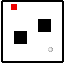

In [ ]:
from IPython.display import Image
Image(filename='pos_bc_anim.png', width=200, height=200)
Image(filename='rgb_bc_anim.png', width=200, height=200)